In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
movies = pd.read_csv('/home/pahpan/Rep/ML/cluster/data/movies.csv')
ratings = pd.read_csv('/home/pahpan/Rep/ML/cluster/data/ratings.csv')
tags = pd.read_csv('/home/pahpan/Rep/ML/cluster/data/tags.csv')

In [3]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.info()
ratings['rating'].describe()
ratings['rating'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [9]:
tags['tag'].value_counts().head(5)

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
Name: tag, dtype: int64

In [10]:
tags['tag'].unique()[:5]

array(['funny', 'Highly quotable', 'will ferrell', 'Boxing story', 'MMA'],
      dtype=object)

In [11]:
movies = movies.drop(columns=['title', 'genres'], axis=1)
movies[:5]

,movieId
0,1
1,2
2,3
3,4
4,5


In [12]:
ratings = ratings.drop(columns=['timestamp'], axis=1)
ratings[:5]

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [13]:
data = pd.merge(ratings, movies, on='movieId')
data.head(10)

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
5,18,1,3.5
6,19,1,4.0
7,21,1,3.5
8,27,1,3.0
9,31,1,5.0


In [14]:
data_table = pd.pivot_table(data, index='userId', columns='movieId', values='rating')
data_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [16]:
movieId_sliced50 = ratings['movieId'].value_counts()[ratings['movieId'].value_counts() > 50] # выборка movieId, которые оценили > 50

In [17]:
movieId_sliced50.head(10)

356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: movieId, dtype: int64

In [18]:
movieId_sliced50.index

Int64Index([  356,   318,   296,   593,  2571,   260,   480,   110,   589,
              527,
            ...
            30707,     3,  6870,  4776,  4239,  4848,  1645,   145,  1215,
             2100],
           dtype='int64', length=436)

In [19]:
ratings_sliced = ratings[ratings['movieId'].isin(movieId_sliced50.index)]

In [20]:
ratings_sliced.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
7,1,110,4.0
10,1,163,5.0
12,1,223,3.0
13,1,231,5.0


In [21]:
user_sliced50 = ratings_sliced['userId'].value_counts()[ratings_sliced['userId'].value_counts() > 50] # выборка userId, которые оценили > 50 

In [22]:
user_sliced50.head(10)

414    416
68     383
599    378
480    341
274    340
474    330
448    311
590    305
608    302
380    294
Name: userId, dtype: int64

In [23]:
user_sliced50.index

Int64Index([414,  68, 599, 480, 274, 474, 448, 590, 608, 380,
            ...
             40, 211,  34, 178, 344, 159, 229, 455, 405, 268],
           dtype='int64', length=260)

In [24]:
ratings_sliced = ratings_sliced[ratings_sliced['userId'].isin(user_sliced50.index)]

In [25]:
ratings_sliced.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
7,1,110,4.0
10,1,163,5.0
12,1,223,3.0
13,1,231,5.0


In [26]:
data = pd.merge(ratings_sliced, movies, on='movieId')
data_table = pd.pivot_table(data, index='userId', columns='movieId', values='rating')

In [27]:
#сохраняем результат в csv
data_table.to_csv(path_or_buf='data.csv', index_label='userId')

In [28]:
data_table[:5]

movieId,1,2,3,6,7,10,11,16,17,19,...,81845,89745,91500,91529,99114,106782,109374,109487,112852,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,3.0,2.0,1.0,NaN,2.0,4.0,1.5,2.0


# KNN

In [32]:
#заполнение NaN средним по столбуц
data = data_table.fillna(data_table.mean())
data[:5]

movieId,1,2,3,6,7,10,11,16,17,19,...,81845,89745,91500,91529,99114,106782,109374,109487,112852,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,3.446237,4.000000,4.000000,3.151515,3.463542,3.736364,3.927419,3.728261,2.681818,...,3.884615,3.807692,3.511111,3.833333,3.913462,3.814286,3.85,3.897727,4.068182,3.736842
4,3.881757,3.446237,3.171429,3.858108,3.151515,3.463542,3.736364,3.927419,3.728261,2.681818,...,3.884615,3.807692,3.511111,3.833333,3.913462,3.814286,3.85,3.897727,4.068182,3.736842
6,3.881757,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000,...,3.884615,3.807692,3.511111,3.833333,3.913462,3.814286,3.85,3.897727,4.068182,3.736842
7,4.500000,3.446237,3.171429,3.858108,3.151515,3.463542,3.736364,3.927419,3.728261,2.681818,...,3.884615,3.807692,3.511111,3.833333,3.913462,3.814286,3.85,3.897727,4.068182,3.736842
15,2.500000,3.446237,3.171429,3.858108,3.151515,3.463542,3.736364,3.927419,3.728261,2.681818,...,3.884615,2.000000,3.000000,2.000000,1.000000,3.814286,2.00,4.000000,1.500000,2.000000


In [81]:
k_means = KMeans(n_clusters=6, n_init=5, random_state=0) # n_clusters = 6
labels = k_means.fit_predict(X=data)
labels

array([3, 0, 3, 4, 4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 3,
       3, 3, 0, 4, 3, 4, 3, 3, 0, 4, 3, 5, 4, 0, 3, 4, 4, 4, 0, 4, 3, 4,
       3, 4, 4, 4, 4, 3, 4, 0, 4, 4, 4, 4, 3, 3, 4, 3, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 4, 4, 0, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 0, 4, 4, 0, 3,
       3, 4, 4, 0, 4, 4, 0, 4, 3, 4, 4, 4, 4, 4, 0, 3, 4, 3, 4, 3, 3, 3,
       4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 0, 4, 4, 4, 0, 0,
       4, 3, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 3, 4, 4, 0, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 0, 4, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4,
       0, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 0, 4, 3, 4, 4, 4, 0, 4, 4,
       4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 3, 3,
       4, 4, 3, 0, 3, 4, 3, 0, 0, 3, 4, 4, 4, 4, 4, 4, 2, 3], dtype=int32)

In [83]:
clusters = [[data.index[i] for i in range(len(labels)) if labels[i] == j] for j in range(15)]
clusters[1]

[330]

In [84]:
centers = k_means.cluster_centers_
centers

array([[3.51032282, 3.16158901, 2.93452381, ..., 3.65656566, 3.92613636,
        3.57309942],
       [4.        , 1.5       , 3.        , ..., 3.89772727, 4.06818182,
        3.73684211],
       [2.5       , 2.        , 2.        , ..., 3.89772727, 4.06818182,
        3.73684211],
       [4.15906532, 3.7094086 , 3.35666667, ..., 3.98484848, 4.16780303,
        3.90219298],
       [3.87789575, 3.43875643, 3.17098492, ..., 3.91918408, 4.06013552,
        3.71019941],
       [2.5       , 2.5       , 2.        , ..., 3.89772727, 4.5       ,
        4.        ]])

In [87]:
def MSE(data, clusters, centers):
    sumerr = 0
    for i in range(len(centers)):
        cluster_data = data[data.index.isin(clusters[i])]
        err = ((cluster_data - centers[i])**2).sum(axis=1).sum() / len(clusters[i])
        sumerr += err
    return sumerr

In [88]:
MSE(data, clusters, centers)

338.36731270702825

In [89]:
errors = []
for k in range(1, 15):
    k_means = KMeans(n_clusters=k, n_init = 20, random_state=0)
    labels = k_means.fit_predict(X=data)
    clusters = [[data.index[i] for i in range(len(labels)) if labels[i] == j] for j in range(k)]
    centers = k_means.cluster_centers_
    err_k = MSE(data, clusters, centers)
    errors.append(err_k)

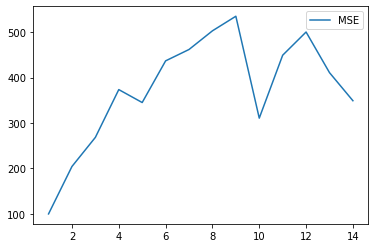

In [91]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, 15)], errors, label='MSE')
plt.legend()
plt.show()